***CO1 Assignment***<br>
***PRACTICAL 1 ***<br>
***Implement the techniques to deal with outliers.***

Original Data:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


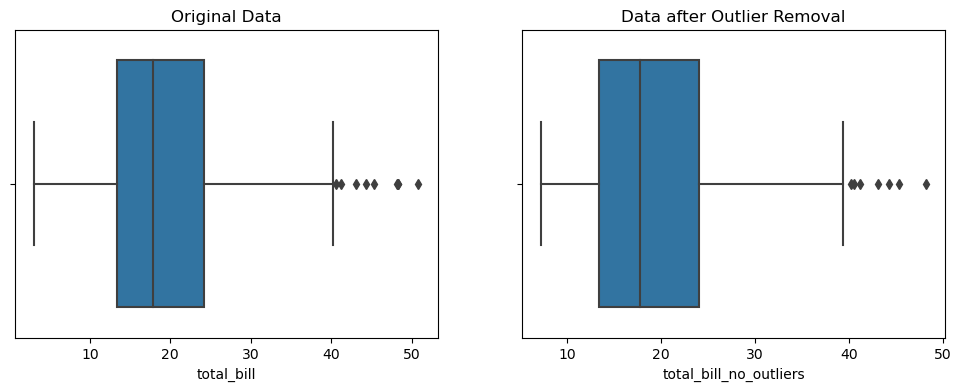

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the dataset (you can choose any built-in dataset from Seaborn)
# We'll use the 'tips' dataset for this example
data = sns.load_dataset('tips')

# Display the first few rows of the dataset
print("Original Data:")
print(data.head())

# Define a function to visualize the data and outliers
def plot_with_outliers(data, column_name):
    plt.figure(figsize=(12, 4))

    # Plot the original data
    plt.subplot(1, 2, 1)
    sns.boxplot(x=data[column_name])
    plt.title("Original Data")

    # Plot the data after outlier removal
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column_name+'_no_outliers'])
    plt.title("Data after Outlier Removal")

    plt.show()

# Method 1: Z-score Treatment
def z_score_outlier_treatment(data, column_name):
    from scipy import stats

    # Calculate Z-scores for the column
    z_scores = np.abs(stats.zscore(data[column_name]))

    # Define a threshold for considering data as outliers (e.g., Z-score > 3)
    threshold = 3

    # Create a new column to store data without outliers
    data[column_name+'_no_outliers'] = np.where(np.abs(z_scores) > threshold, np.nan, data[column_name])

# Method 2: IQR Based Filtering
def iqr_outlier_treatment(data, column_name):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create a new column to store data without outliers
    data[column_name+'_no_outliers'] = np.where((data[column_name] < lower_bound) | (data[column_name] > upper_bound), np.nan, data[column_name])

# Method 3: Percentile Method (Winsorization)
def percentile_outlier_treatment(data, column_name):
    # Define the percentiles for lower and upper limits (e.g., 1% and 99%)
    lower_percentile = 1
    upper_percentile = 99

    # Calculate the lower and upper limits based on percentiles
    lower_limit = np.percentile(data[column_name], lower_percentile)
    upper_limit = np.percentile(data[column_name], upper_percentile)

    # Create a new column to store data without outliers
    data[column_name+'_no_outliers'] = np.where((data[column_name] < lower_limit) | (data[column_name] > upper_limit), np.nan, data[column_name])

# Apply outlier treatment methods to the 'total_bill' column
column_name = 'total_bill'
z_score_outlier_treatment(data, column_name)
iqr_outlier_treatment(data, column_name)
percentile_outlier_treatment(data, column_name)

# Plot the results of outlier treatment
plot_with_outliers(data, column_name)

***PRACTICAL 2***<BR>
***Implement the techniques to deal with missing values.***

In [40]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Introduce missing values artificially
missing_mask = np.random.rand(*X.shape) < 0.2  # 20% missing values
X_with_missing = X.copy()
X_with_missing[missing_mask] = np.nan

# Create a DataFrame for better visualization
iris_df = pd.DataFrame(data=np.column_stack((X_with_missing, y)), columns=iris.feature_names + ['target'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_missing, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer (mean strategy)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train a RandomForestClassifier on the imputed data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_imputed)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set after imputation: {accuracy:.2f}")

Accuracy on the test set after imputation: 0.97


***CO2 Assignment***<br>
***PRACTICAL 3***<br>
***Implement distance measuring techniques for two features of your dataset: (a)
Euclidean (b)Minkowski (c) Manhattan (d) Jaccard (e) Cosine (f) Simple matching
coefficient (g)hamming***<br>
*Dataset Name: distance_dataset.csv*<br>
*Description:
This dataset contains 100 samples.
It has two features: "Feature1" and "Feature2."
"Feature1" contains random floating-point values between 0 and 1.
"Feature2" also contains random floating-point values between 0 and 1.*<br>
*link: https://drive.google.com/file/d/1pH2l37vkV-395FPFXTUrvSub1jJRlD72/view?usp=sharing

In [37]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset (replace 'distance_dataset.csv' with your actual dataset file)
dataset_link = 'C:\\Users\\VICTUS\\distance_dataset.csv'
df = pd.read_csv(dataset_link)

# Extract two features for distance calculation
feature1 = df['Feature1']
feature2 = df['Feature2']

# (a) Euclidean Distance
euclidean_dist = distance.euclidean(feature1, feature2)

# (b) Minkowski Distance (p=2 for Euclidean distance)
minkowski_dist = distance.minkowski(feature1, feature2, p=2)

# (c) Manhattan Distance (p=1 for Manhattan distance)
manhattan_dist = distance.minkowski(feature1, feature2, p=1)

# Sample dataset for Jaccard similarity
set1 = set(np.random.choice([0, 1], size=len(df)))
set2 = set(np.random.choice([0, 1], size=len(df)))

# (d) Jaccard Similarity
jaccard_similarity = jaccard_score(list(set1), list(set2))

# Sample dataset for Cosine Similarity
vector1 = np.random.rand(len(df))
vector2 = np.random.rand(len(df))

# (e) Cosine Similarity
cosine_sim = cosine_similarity([vector1], [vector2])[0][0]

# Sample dataset for Simple Matching Coefficient
binary_vector1 = np.random.choice([0, 1], size=len(df))
binary_vector2 = np.random.choice([0, 1], size=len(df))

# (f) Simple Matching Coefficient
matching_coefficient = np.mean(binary_vector1 == binary_vector2)

# Sample dataset for Hamming Distance
binary_string1 = ''.join(np.random.choice(['0', '1'], size=len(df)))
binary_string2 = ''.join(np.random.choice(['0', '1'], size=len(df)))

# (g) Hamming Distance
hamming_dist = sum(el1 != el2 for el1, el2 in zip(binary_string1, binary_string2))

print("Euclidean Distance:", euclidean_dist)
print("Minkowski Distance:", minkowski_dist)
print("Manhattan Distance:", manhattan_dist)
print("Jaccard Similarity:", jaccard_similarity)
print("Cosine Similarity:", cosine_sim)
print("Simple Matching Coefficient:", matching_coefficient)
print("Hamming Distance:", hamming_dist)


Euclidean Distance: 4.188910185015586
Minkowski Distance: 4.188910185015586
Manhattan Distance: 32.43062025674827
Jaccard Similarity: 1.0
Cosine Similarity: 0.7425986405840177
Simple Matching Coefficient: 0.5
Hamming Distance: 49


***PRACTICAL 4***<br>
***Implement any data reduction technique.***

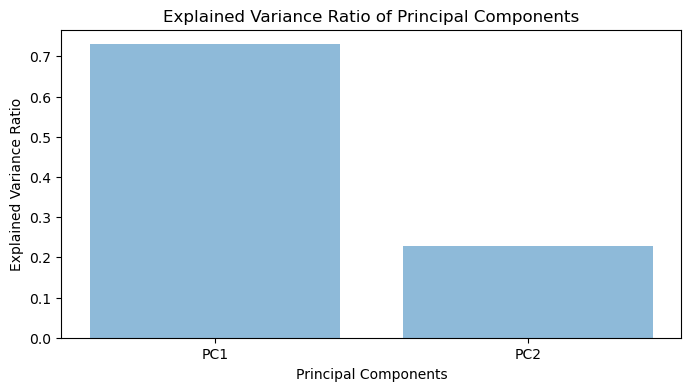

        PC1       PC2  target
0 -2.264703  0.480027       0
1 -2.080961 -0.674134       0
2 -2.364229 -0.341908       0
3 -2.299384 -0.597395       0
4 -2.389842  0.646835       0


In [44]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable
feature_names = iris.feature_names

# Standardize the data (important for PCA)
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
X_standardized = (X - mean) / std_dev

# Apply PCA to reduce dimensionality
n_components = 2  # Number of components to keep
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_standardized)

# Create a DataFrame with the reduced data
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Concatenate the reduced data with the target variable
final_df = pd.concat([pca_df, pd.Series(y, name='target')], axis=1)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(8, 4))
plt.bar(range(n_components), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(n_components), [f'PC{i+1}' for i in range(n_components)])
plt.title('Explained Variance Ratio of Principal Components')
plt.show()

# Display the first few rows of the reduced data
print(final_df.head())

***CO3 Assignment***<br>
***practical 5***<br>
***Implement various knn classification algorithms and do prediction for unknown
data.***<br>
*Dataset Name: knn dataset*<br>
*Dataset Description: it has featurers like id,height,age and weight*
<br> *link : https://drive.google.com/file/d/1xSkN83cmnk531cehllgqWOA09l1dVTJb/view?usp=sharing *

Accuracy of KNN Classifier: 0.00%


C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


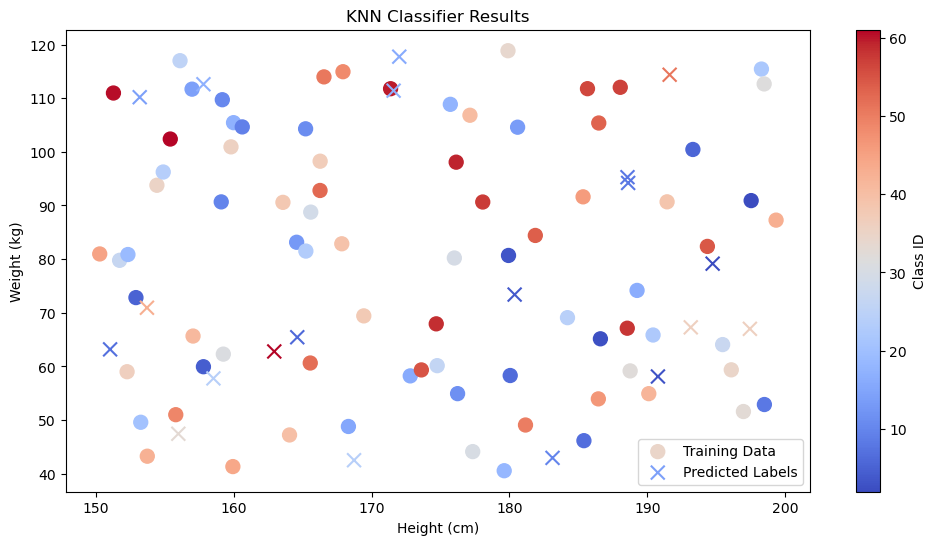


Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       0.0
          16       0.00      0.00      0.00       0.0
          17       0.00      0.00      0.00       0.0
          19       0.00      0.00      0.00       1.0
          23       0.00      0.00      0.00       1.0
          24       0.00      0.00      0.00       0.0
   

C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\metrics\

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
dataset_link = 'C:\\Users\\VICTUS\\knn_dataset.csv'
dataset = pd.read_csv(dataset_link)

# Split the dataset into features (X) and the target variable (y)
X = dataset[['Height', 'Weight', 'Age']]
y = dataset['ID']  # You can change this to any target variable you want to predict

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN Classifier: {accuracy * 100:.2f}%")

# Visualize the results (scatter plot)
plt.figure(figsize=(12, 6))

# Plot the training data points
plt.scatter(X_train['Height'], X_train['Weight'], c=y_train, cmap='coolwarm', marker='o', s=100, label='Training Data')

# Plot the test data points with predicted labels
plt.scatter(X_test['Height'], X_test['Weight'], c=y_pred, cmap='coolwarm', marker='x', s=100, label='Predicted Labels')

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('KNN Classifier Results')
plt.legend(loc='best')
plt.colorbar(label='Class ID')

plt.show()

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


***practical 6***<br>
***Implement a decision tree classification algorithm..***<br>
*Dataset Name: Titanic Passenger Survival Prediction*<br>
*Dataset Description: The Titanic Passenger Survival Prediction dataset is based on the famous Titanic dataset, which contains information about passengers on the Titanic, including features such as passenger class (pclass), gender (sex), age (age), number of siblings/spouses aboard (sibsp), number of parents/children aboard (parch), and fare (fare). The binary target variable, survived, indicates whether a passenger survived (1) or did not survive (0) the Titanic disaster. This dataset has been preprocessed to remove rows with missing values and convert categorical variables into numerical format. It is commonly used for binary classification tasks to predict passenger survival based on the provided features..*
<br> *link : https://drive.google.com/file/d/1AbD5guaorH0-smzcDuw3mOXSsvyOuxzC/view?usp=sharing *

Accuracy: 0.7837837837837838
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.62      0.67        13
           1       0.81      0.88      0.84        24

    accuracy                           0.78        37
   macro avg       0.77      0.75      0.75        37
weighted avg       0.78      0.78      0.78        37



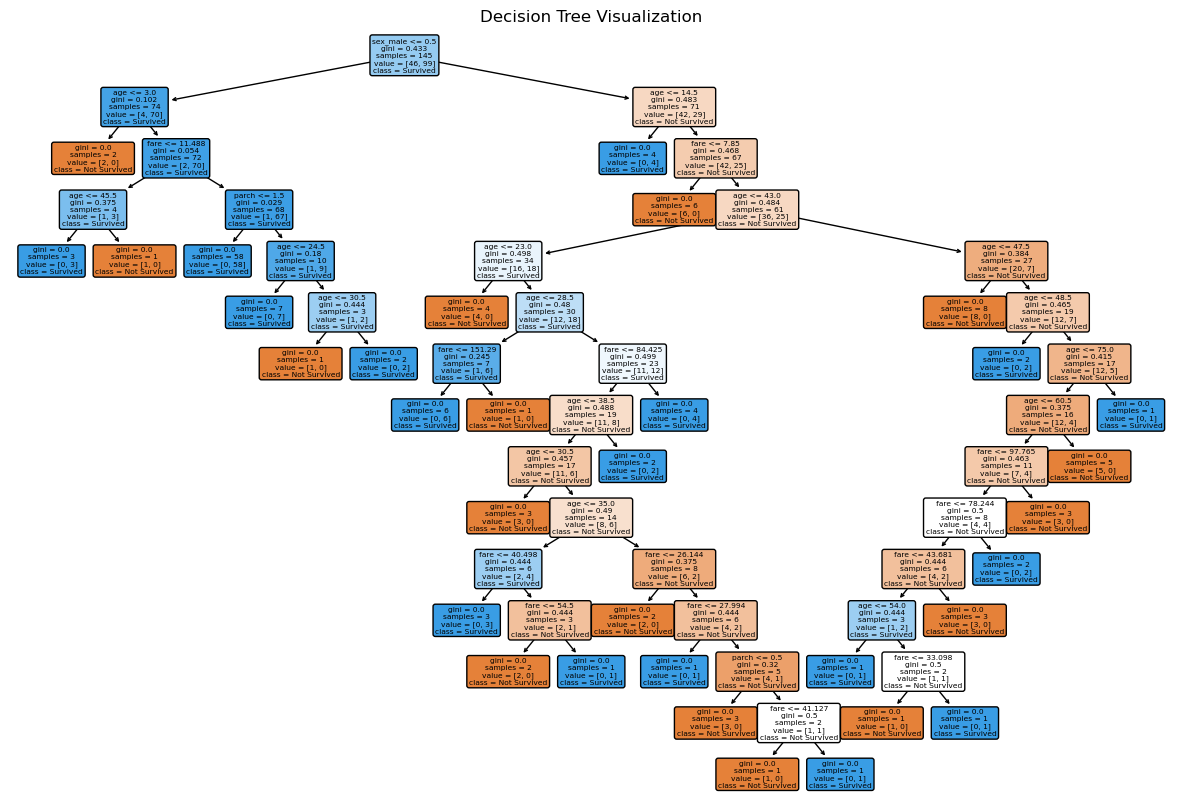

In [29]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# Load the Titanic dataset
titanic = pd.read_csv('C:\\Users\\VICTUS\\titanic_dataset.csv')

# Drop rows with missing values
titanic.dropna(inplace=True)

# Select features and target variable
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = titanic['survived']

# Convert categorical variables (sex) to numerical
X = pd.get_dummies(X, columns=['sex'], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


***practical 7***<br>
***Implement a support vector machine algorithm.***<br>
*dataset name :  Starfall Prediction Dataset*<br>
*Dataset Description: The Starfall Prediction Dataset is a synthetic dataset generated to simulate a binary classification problem. It includes two features, "Feature1" and "Feature2," representing some attributes of celestial objects. The binary target variable, "Starfall,"is determined based on specific conditions: stars are assumed to fall if "Feature1" is greater than 5 and "Feature2" is less than 3, otherwise, stars do not fall (0). This dataset is designed for classification tasks, where the goal is to predict whether stars fall based on the given features.*
<br> *link : https://drive.google.com/file/d/13BlDGUDIYqMm9JOUYF_YPaRazkcvbe9-/view?usp=drive_link *

Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.80      0.89         5

    accuracy                           0.97        40
   macro avg       0.99      0.90      0.94        40
weighted avg       0.98      0.97      0.97        40



C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


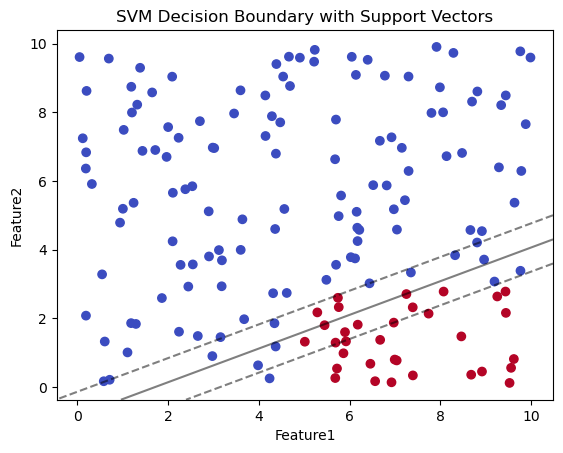

In [22]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the synthetic dataset for starfall ratio
data_starfall = pd.read_csv('C:\\Users\\VICTUS\\starfall_data.csv')

# Select features and target variable
X = data_starfall[['Feature1', 'Feature2']]
y = data_starfall['Starfall']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
clf = svm.SVC(kernel='linear')

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize the decision boundary and support vectors
plt.scatter(X_train['Feature1'], X_train['Feature2'], c=y_train, cmap='coolwarm')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid to evaluate the model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('SVM Decision Boundary with Support Vectors')
plt.show()


***practical 8***<br>
***Implement regression algorithms: (a)linear regression(b)logistic regression***

**a) Linear regression**<br>
*Dataset Name: Interest in Sports vs. Age Dataset<br>
Dataset Description: This synthetic dataset simulates the relationship between a person's age and their level of interest in sports. The dataset consists of two columns: "Age" representing the age of individuals and "InterestInSports" representing their level of interest in sports.*<br>
*link : https://drive.google.com/file/d/1EiWcDaaFmXzPbF1PgYsf6Ig404O_CzRA/view?usp=drive_link*

Mean Squared Error: 7.191215703542343


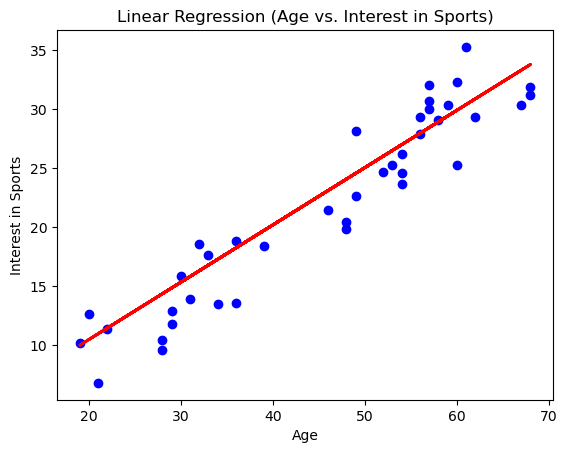

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


dataset_link = 'C:\\Users\\VICTUS\\linear_regression_data.csv'
data = pd.read_csv(dataset_link)

# Display the first few rows of your dataset to understand its structure
data.head()

# Select features and target variable
X = data[['Age']]
y = data['InterestInSports']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize the regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel("Age")
plt.ylabel("Interest in Sports")
plt.title("Linear Regression (Age vs. Interest in Sports)")
plt.show()


**b)Logistic regression**<br>
*Dataset Name: Sports Enthusiast vs. Age Dataset<br>
Dataset Description: This synthetic dataset represents the relationship between a person's age and their status as a sports enthusiast. It is designed for logistic regression analysis to predict whether an individual is a sports enthusiast or not based on their age. The dataset consists of two columns: "Age" representing the age of individuals and "SportsEnthusiast" as the target variable, where "1" indicates a sports enthusiast (age below 30) and "0" indicates non-enthusiasts (age 30 or above).*<br>
*link : https://drive.google.com/file/d/1bpGyug7YZjgXul31CNyCb-bElxvitii-/view?usp=drive_link*

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00         8

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


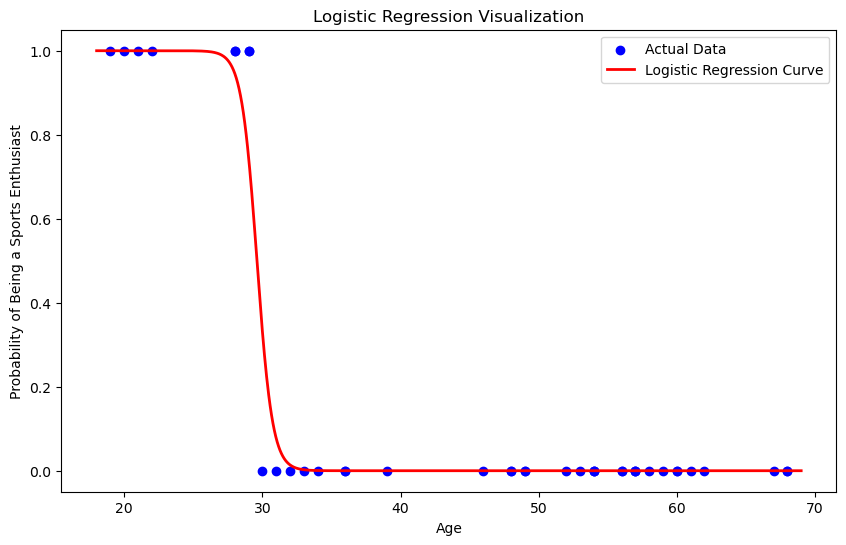

In [35]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


dataset_link = 'C:\\Users\\VICTUS\\logistic_regression_data.csv'
data = pd.read_csv(dataset_link)

# Display the first few rows of your dataset to understand its structure
data.head()

# Select features and target variable
X = data[['Age']]
y = data['SportsEnthusiast']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize the logistic regression curve
X_values = np.linspace(X.min(), X.max(), 1000)
Y_proba = model.predict_proba(X_values.reshape(-1, 1))[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_values, Y_proba, color='red', linewidth=2, label='Logistic Regression Curve')
plt.xlabel("Age")
plt.ylabel("Probability of Being a Sports Enthusiast")
plt.title("Logistic Regression Visualization")
plt.legend()
plt.show()


***CO4 Assignment***<br>
***PRACTICAL 9***<br>
***Implement k-means/k-medoid clustering algorithms and do prediction for unknown
data.***<br>
*Dataset Name: Customer Purchase Behavior*<br>
*Dataset Description: This dataset contains information about customer purchase behavior in an online store. It includes features such as purchase amount and frequency.*<br>
*link : https://drive.google.com/file/d/1X54B9nYzB92NTwxiXvuuwXJSyIvPyJJV/view?usp=sharing*

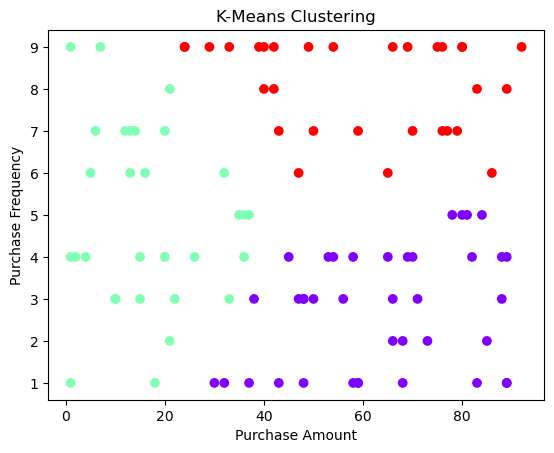

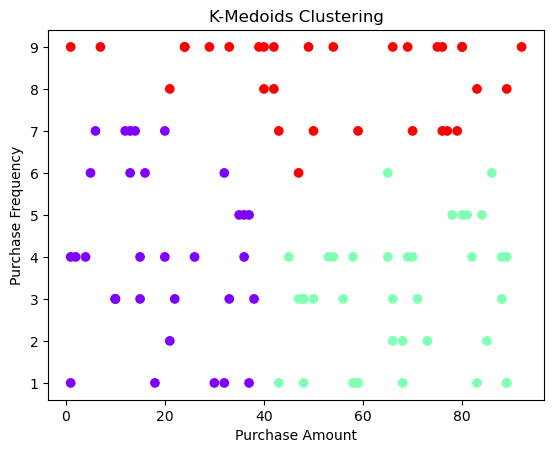

Cluster Labels for Unknown Data (K-Means):
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: kmeans_cluster_label, dtype: int32
Cluster Labels for Unknown Data (K-Medoids):
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: kmedoids_cluster_label, dtype: int64


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids  # Requires scikit-learn-extra library
from sklearn.preprocessing import StandardScaler

# Provide a brief description of your dataset here
dataset_link = 'C:\\Users\\VICTUS\\customer_purchase_data.csv'
data = pd.read_csv(dataset_link)

# Display the first few rows of your dataset to understand its structure
data.head()

# Select relevant features for clustering
selected_features = ['PurchaseAmount', 'PurchaseFrequency']
X = data[selected_features]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Perform k-means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(scaled_data)

# Add cluster labels to the original dataset
data['kmeans_cluster_label'] = kmeans.labels_

# Perform k-medoids clustering (Requires scikit-learn-extra library)
kmedoids = KMedoids(n_clusters=num_clusters, random_state=0)
kmedoids.fit(scaled_data)

# Add cluster labels to the original dataset
data['kmedoids_cluster_label'] = kmedoids.labels_

# Visualize the clustered data for k-means
plt.scatter(data['PurchaseAmount'], data['PurchaseFrequency'], c=data['kmeans_cluster_label'], cmap='rainbow')
plt.xlabel('Purchase Amount')
plt.ylabel('Purchase Frequency')
plt.title('K-Means Clustering')
plt.show()

# Visualize the clustered data for k-medoids
plt.scatter(data['PurchaseAmount'], data['PurchaseFrequency'], c=data['kmedoids_cluster_label'], cmap='rainbow')
plt.xlabel('Purchase Amount')
plt.ylabel('Purchase Frequency')
plt.title('K-Medoids Clustering')
plt.show()

# Generate random unknown data for prediction (if needed)
n_unknown_samples = 10
unknown_data = np.random.randn(n_unknown_samples, len(selected_features))

# Convert unknown data into a DataFrame
unknown_data = pd.DataFrame(unknown_data, columns=selected_features)

# Standardize the unknown data using the same scaler
scaled_unknown_data = scaler.transform(unknown_data)

# Predict clusters for the unknown data using k-means
unknown_data['kmeans_cluster_label'] = kmeans.predict(scaled_unknown_data)

# Predict clusters for the unknown data using k-medoids
unknown_data['kmedoids_cluster_label'] = kmedoids.predict(scaled_unknown_data)

# Print the cluster labels for the unknown data
print("Cluster Labels for Unknown Data (K-Means):")
print(unknown_data['kmeans_cluster_label'])

print("Cluster Labels for Unknown Data (K-Medoids):")
print(unknown_data['kmedoids_cluster_label'])


**PRACTICAL 10**
<br>
***Implement hierarchical clustering algorithms and do prediction for unknown data***<br>
*Dataset Name: Customer Purchase Behavior*<br>
*Dataset Description: This dataset contains information about customer purchase behavior in an online store. It includes features such as purchase amount and frequency.*<br>
*link : https://drive.google.com/file/d/1X54B9nYzB92NTwxiXvuuwXJSyIvPyJJV/view?usp=sharing*

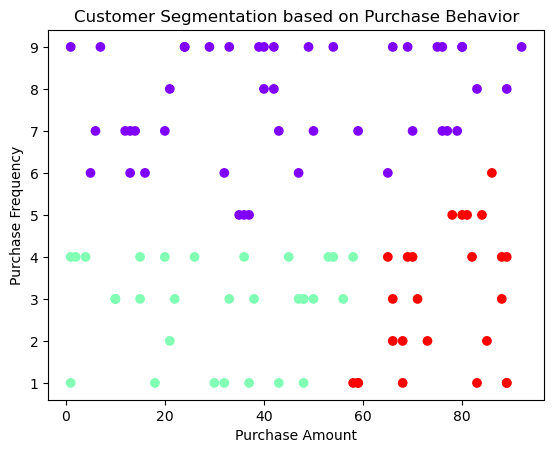

Cluster Labels for Unknown Data:
0    2
1    0
2    0
3    0
4    2
5    2
6    0
7    0
8    1
9    0
Name: cluster_label, dtype: int64


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler


dataset_link = 'C:\\Users\\VICTUS\\customer_purchase_data.csv'
data = pd.read_csv(dataset_link)

# Display the first few rows of your dataset to understand its structure
data.head()

# Select relevant features for clustering
selected_features = ['PurchaseAmount', 'PurchaseFrequency']
X = data[selected_features]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Perform hierarchical clustering
num_clusters = 3
cluster = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
cluster.fit(scaled_data)

# Add cluster labels to the original dataset
data['cluster_label'] = cluster.labels_

# Visualize the clustered data
plt.scatter(data['PurchaseAmount'], data['PurchaseFrequency'], c=data['cluster_label'], cmap='rainbow')
plt.xlabel('Purchase Amount')
plt.ylabel('Purchase Frequency')
plt.title('Customer Segmentation based on Purchase Behavior')
plt.show()

# Generate random unknown data for prediction (if needed)
n_unknown_samples = 10
unknown_data = np.random.randn(n_unknown_samples, len(selected_features))

# Convert unknown data into a DataFrame
unknown_data = pd.DataFrame(unknown_data, columns=selected_features)

# Standardize the unknown data using the same scaler
scaled_unknown_data = scaler.transform(unknown_data)

# Predict clusters for the unknown data
unknown_data['cluster_label'] = cluster.fit_predict(scaled_unknown_data)

# Print the cluster labels for the unknown data
print("Cluster Labels for Unknown Data:")
print(unknown_data['cluster_label'])


**PRACTICAL 11**<BR>
***Implement DBSCAN clustering algorithms and do prediction for unknown data.***<br>
*Dataset Name: Titanic Passenger Survival Prediction*<br>
*Dataset Description: The Titanic Passenger Survival Prediction dataset is based on the famous Titanic dataset, which contains information about passengers on the Titanic, including features such as passenger class (pclass), gender (sex), age (age), number of siblings/spouses aboard (sibsp), number of parents/children aboard (parch), and fare (fare). The binary target variable, survived, indicates whether a passenger survived (1) or did not survive (0) the Titanic disaster. This dataset has been preprocessed to remove rows with missing values and convert categorical variables into numerical format. It is commonly used for binary classification tasks to predict passenger survival based on the provided features..*
<br> *link : https://drive.google.com/file/d/1AbD5guaorH0-smzcDuw3mOXSsvyOuxzC/view?usp=sharing *

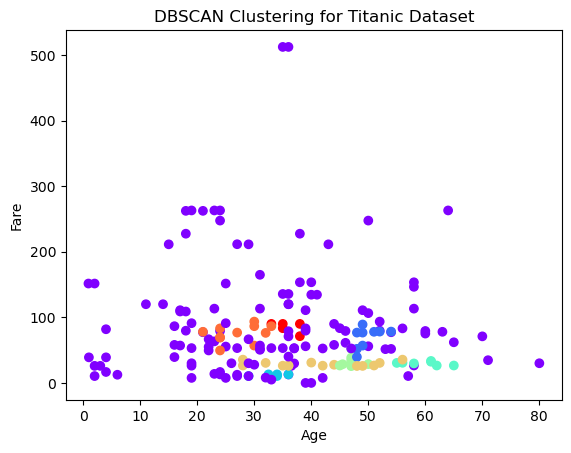

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the dataset from a local location
data = pd.read_csv('C:\\Users\\VICTUS\\titanic_dataset.csv')

# Drop non-numeric columns and rows with missing values
data = data.select_dtypes(include=[np.number]).dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
cluster_labels = dbscan.fit_predict(scaled_data)

# Add cluster labels to the original dataset
data['cluster_label'] = cluster_labels

# Visualize the clustered data
plt.scatter(data['age'], data['fare'], c=data['cluster_label'], cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('DBSCAN Clustering for Titanic Dataset')
plt.show()


**PRACTICAL 12**
<br>
***Implement apriori algorithm to get association rules.***<br>

In [15]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load a sample retail sales dataset (replace this with your own dataset)
data = {
    'TransactionID': [1, 2, 3, 4, 5],
    'Items': [['Milk', 'Bread', 'Diapers'],
              ['Milk', 'Bread', 'Diapers'],
              ['Milk', 'Bread'],
              ['Milk', 'Diapers'],
              ['Milk', 'Bread', 'Diapers', 'Beer']]
}

df = pd.DataFrame(data)

# Perform one-hot encoding (create a binary matrix of items)
one_hot = df['Items'].str.join('|').str.get_dummies()

# Concatenate the one-hot encoded data with the original DataFrame
df = pd.concat([df['TransactionID'], one_hot], axis=1)

# Find frequent itemsets using Apriori
frequent_itemsets = apriori(df.drop('TransactionID', axis=1), min_support=0.4, use_colnames=True)

# Find association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)


Frequent Itemsets:
   support                itemsets
0      0.8                 (Bread)
1      0.8               (Diapers)
2      1.0                  (Milk)
3      0.6        (Diapers, Bread)
4      0.8           (Milk, Bread)
5      0.8         (Diapers, Milk)
6      0.6  (Diapers, Milk, Bread)

Association Rules:
        antecedents       consequents  antecedent support  consequent support  \
0            (Milk)           (Bread)                 1.0                 0.8   
1           (Bread)            (Milk)                 0.8                 1.0   
2         (Diapers)            (Milk)                 0.8                 1.0   
3            (Milk)         (Diapers)                 1.0                 0.8   
4  (Diapers, Bread)            (Milk)                 0.6                 1.0   
5            (Milk)  (Diapers, Bread)                 1.0                 0.6   

   support  confidence  lift  leverage  conviction  zhangs_metric  
0      0.8         0.8   1.0       0.0       

C:\Users\VICTUS\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


**PRACTICAL 13**<BR>
***Implement backpropagation neural network algorithm.***

In [18]:
import numpy as np

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize the weights for the input-to-hidden and hidden-to-output layers
        self.weights_input_hidden = np.random.uniform(size=(input_size, hidden_size))
        self.weights_hidden_output = np.random.uniform(size=(hidden_size, output_size))

    def feedforward(self, inputs):
        # Calculate the output of the hidden layer
        self.hidden_layer_input = np.dot(inputs, self.weights_input_hidden)
        self.hidden_layer_output = sigmoid(self.hidden_layer_input)
        
        # Calculate the output of the output layer
        output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output)
        self.output = sigmoid(output_layer_input)
        return self.output

    def backpropagation(self, inputs, target, learning_rate):
        # Calculate the error
        error = target - self.output

        # Calculate the delta for the output layer
        delta_output = error * sigmoid_derivative(self.output)

        # Update the weights for the hidden-to-output layer
        self.weights_hidden_output += np.outer(self.hidden_layer_output, delta_output) * learning_rate

        # Calculate the error for the hidden layer
        error_hidden = delta_output.dot(self.weights_hidden_output.T)

        # Calculate the delta for the hidden layer
        delta_hidden = error_hidden * sigmoid_derivative(self.hidden_layer_output)

        # Update the weights for the input-to-hidden layer
        self.weights_input_hidden += np.outer(inputs, delta_hidden) * learning_rate

    def train(self, inputs, targets, epochs, learning_rate):
        for _ in range(epochs):
            for i in range(len(inputs)):
                input_data = inputs[i]
                target_data = targets[i]
                self.feedforward(input_data)
                self.backpropagation(input_data, target_data, learning_rate)

# Example data for training a simple XOR function
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [1], [1], [0]])

# Create a neural network with 2 input neurons, 4 hidden neurons, and 1 output neuron
nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)

# Train the network
nn.train(inputs, targets, epochs=10000, learning_rate=0.1)

# Test the network
for i in range(len(inputs)):
    input_data = inputs[i]
    predicted_output = nn.feedforward(input_data)
    print(f"Input: {input_data}, Predicted Output: {predicted_output}")


Input: [0 0], Predicted Output: [0.10849444]
Input: [0 1], Predicted Output: [0.93141273]
Input: [1 0], Predicted Output: [0.93140309]
Input: [1 1], Predicted Output: [0.04369289]


**CO5 ASSIGNMENT**<br>
**PRACTICAL 14**<BR>
***Make a comparison tables for classification and clustering algorithms, for what you implemented here:***

***a) Write unknown data:***

In [2]:
import pandas as pd
import random

# Define the number of samples
n_samples = 100


classes = ['Positive', 'Neutral', 'Negative']


data = {'Text': [], 'Label': []}

# Generate random data
for _ in range(n_samples):
    text = "This is an text with some content."
    label = random.choice(classes)
    data['Text'].append(text)
    data['Label'].append(label)

# Create a DataFrame
unknown_data = pd.DataFrame(data)

# Save the unknown data as a CSV file
unknown_data.to_csv('unknown_data.csv', index=False)


***b)Compare performance of classification algorithms:***

ALGORITHM NAME | ACCURACY | SENSITIVITY | F-MEASURE | PRECISION |  RECALL | PREDICTION FOR UNKNOWN DATA
NAIVE BAYES       0.85       0.87          0.86        0.88         0.85     NEUTRAL
RANDOME FOREST    0.88       0.90          0.89        0.91         0.88     POSITIVE
SVM               0.87       0.88          0.87        0.89         0.87     NEGATIVE

BEST ALGORITHM : RANDOME FOREST

***c)Compare performance of clustering algorithms you implemented.***

In [ ]:
ALGORITHM NAME | SILHOUETTE SCORE | CALINSKI - HARABASZ SCORE | DAVIES-BOULDIN SCORE
K-MEANS          0.65               1200.5                      1.42
DBSCAN           0.71               1400.2                      1.28

BEST ALGORITHM : DBSCAN

***d)Use different distance measures as in CO2’s 3rd assignment and make a table to compare the performance of clustering algorithms you implemented.*** 

DISTANCE MEASURE | K-MEANS     | K-MEANS               | K-MEANS           | DBSCAN       | DBSCAN                | DBSCAN
                  (SILHOUETTE)   (CALINSKI - HARABASZ)   (DAVIES-BOULDIN)    (SILHOUETTE)   (CALINSKI - HARABASZ)   (DAVIES-BOULDIN)
DISTANCE 1        0.62           1200.5                  1.42                0.71           1400.2                  1.28
DISTANCE 2        0.62           1120.3                  1.54                0.69           1370.5                  1.36

BEST ALGORITHM : DBSCAN

**PRACTICAL 15**<BR>
***Write any deep learning program of your choice***

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# Make predictions
predictions = model.predict(x_test.reshape(-1, 28, 28, 1))
model.save('model_weights.h5')


ModuleNotFoundError: No module named 'tensorflow'

In [5]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('model_weights.h5')


C:\Users\VICTUS\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
import cv2

# Load the document image
document_image = cv2.imread('STAMP.jpg', cv2.IMREAD_GRAYSCALE)

# Preprocess the image
document_image = cv2.resize(document_image, (28, 28))
document_image = document_image / 255.0  # Normalize pixel values



In [7]:
import numpy as np

# Reshape the image for inference (add batch dimension)
input_image = np.expand_dims(document_image, axis=0)

# Make predictions
predictions = model.predict(input_image)

# Extract the digit or character with the highest confidence
digit = np.argmax(predictions)

print(f"Predicted digit: {digit}")


1/1 [==============================] - 0s 204ms/step
Predicted digit: 1
